In [1]:
import numpy as np
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

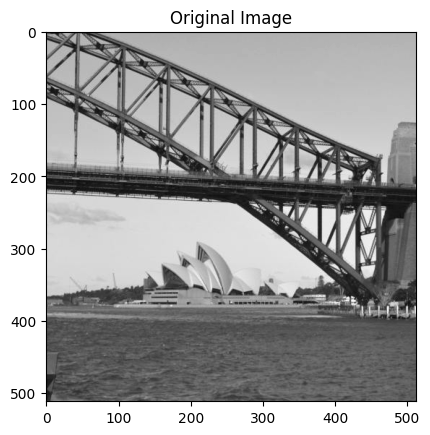

In [6]:
f = np.array(plt.imread('operahall.png'), dtype=float)

plt.imshow(f,cmap='gray')
plt.title("Original Image")
plt.show

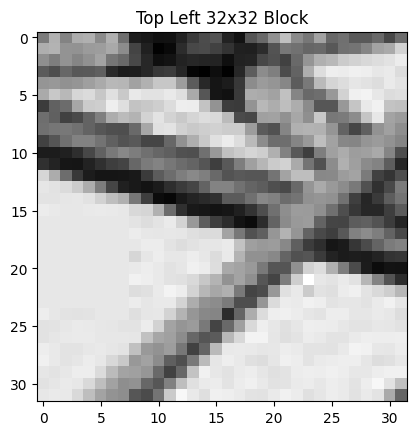

In [7]:
block = f[:32, :32]

plt.imshow(block, cmap='gray')
plt.title("Top Left 32x32 Block")
plt.show()

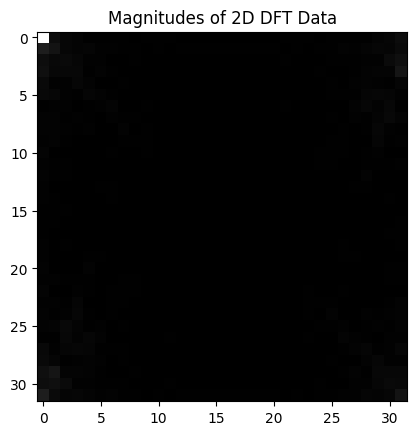

In [14]:
F = np.fft.fft2(block)

plt.imshow(np.abs(F), cmap='gray')
plt.title("Magnitudes of 2D DFT Data")
plt.show()

In [ ]:
# The top left pixel is the DC-component, its the average of the values in the signal i.e. the average brightness of all pixels in the image

In [15]:
F[0, 0] = 0

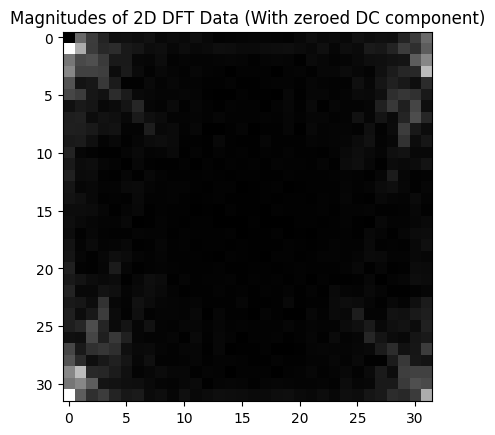

In [16]:
plt.imshow(np.abs(F), cmap='gray')
plt.title("Magnitudes of 2D DFT Data (With zeroed DC component)")
plt.show()

In [17]:
def Compress(X, tol):
    h, w = X.shape
    Y = np.zeros_like(X)
    total_coefficients = 0
    dropped_coefficients = 0

    for i in range(0, h, 32):
        for j in range(0, w, 32):
            block = X[i:i+32, j:j+32]
            F = np.fft.fft2(block)
            F_max = np.max(np.abs(F))
            mask = np.abs(F) > F_max * tol
            F = F * mask
            total_coefficients += np.sum(mask)
            dropped_coefficients += np.sum(~mask)
            Y[i:i+32, j:j+32] = np.real(np.fft.ifft2(F))

    drop_ratio = dropped_coefficients / total_coefficients

    return Y, drop_ratio

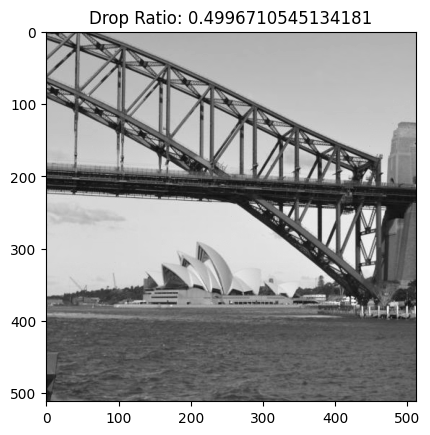

In [51]:
tol = 0.000445
(Y, ratio) = Compress(f, tol)
plt.imshow(Y, cmap='gray')
plt.title(f"Drop Ratio: {ratio}")
plt.show()

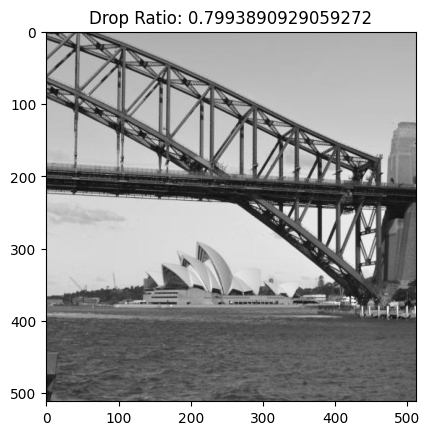

In [57]:
tol = 0.000775
(Y, ratio) = Compress(f, tol)
plt.imshow(Y, cmap='gray')
plt.title(f"Drop Ratio: {ratio}")
plt.show()

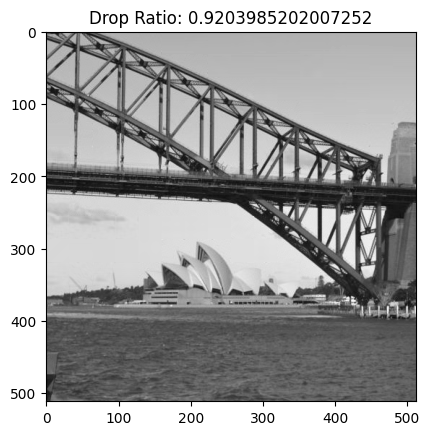

In [66]:
tol = 0.0009105
(Y, ratio) = Compress(f, tol)
plt.imshow(Y, cmap='gray')
plt.title(f"Drop Ratio: {ratio}")
plt.show()

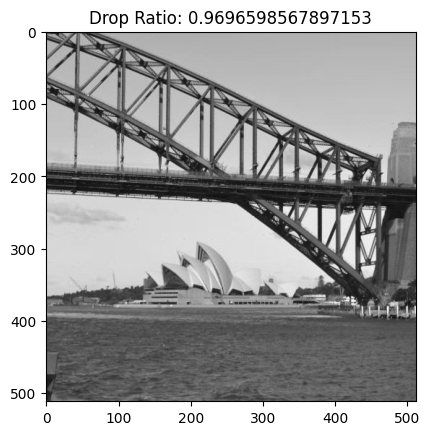

In [73]:
tol = 0.000964
(Y, ratio) = Compress(f, tol)
plt.imshow(Y, cmap='gray')
plt.title(f"Drop Ratio: {ratio}")
plt.show()

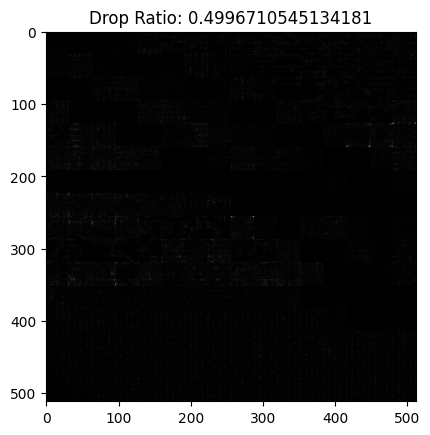

In [81]:
# The image with the least compression is the one with the smallest drop ratio: 0.5
# i.e. the image that dropped the fewest number of nonzero Fourier coefficients
tol = 0.000445
(Y, ratio) = Compress(f, tol)
plt.imshow(np.abs(Y - f), cmap='gray')
plt.title(f"Drop Ratio: {ratio}")
plt.show()